In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

### knn(최근접이웃) 알고리즘

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


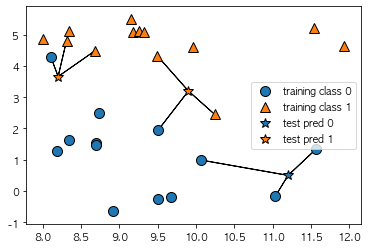

In [57]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [58]:
x,y = mglearn.datasets.make_forge()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [59]:
x

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [60]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [63]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [64]:
knn.score(x_train, y_train)

0.95

In [65]:
knn.score(x_test, y_test)

0.8333333333333334

## Overfitting(과적합)   
- 알고리즘이 train data에 과도하게 학습되어, test data를 잘 맞추지 못하는 현상. 
- 모델이 train data만 말 맞추도록 지나치게 복잡하게 만들어진 경우    
### 해소하기 위해서   
- 데이터를 많이 확보
- 모델을 단순화(학습을 방해)
- 단순한 알고리즘 사용

In [51]:
# fig, axes = plt.subplots(1,3, figsize=(10,3))
# for n_neighbors, ax in zip([1,3,9], axes):
#     knn = KNeighborsClassifier(n_neighbors = n_neighbors).fit(x,y)
#     mglearn.plots.plot_2d_separator(knn, x, fill=True, eps=0.5, ax=ax, alpha=0.4)
#     mglearn.discrete_scatter(x[:,0], y[:,1], y, ax=ax)

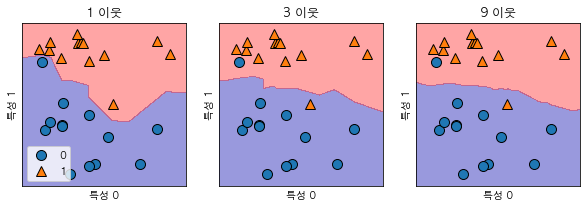

In [66]:
# binary classification

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x, y)
    mglearn.plots.plot_2d_separator(clf, x, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

In [67]:
# multiclass classification
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

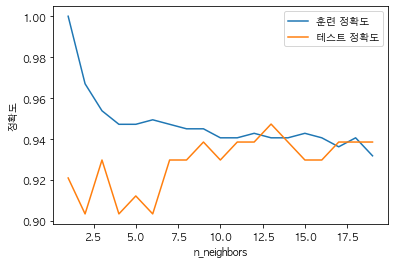

In [69]:
training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용

for k in range(1, 20):
    
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train, y_train)
    
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(x_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(x_test, y_test))
    
plt.plot(list(range(1, 20)), training_accuracy, label="훈련 정확도")
plt.plot(list(range(1, 20)), test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

#### 전체적으로 train data accuracy > test data accuracy

과적합 (k=1) : 모델이 복잡함   
- train data accuracy > test data accuracy

과소적합 (k>=10) : 모델이 학습이 부족해서 예측능력이 낮은 경우..   
- train data와 test data 모두에서 정확도가 낮다..

In [70]:
df = pd.read_csv('./ml_source_files/loan_data.csv')
y = df['not.fully.paid']
x = df.drop('not.fully.paid', axis=1)
x = pd.get_dummies(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123, stratify=y)

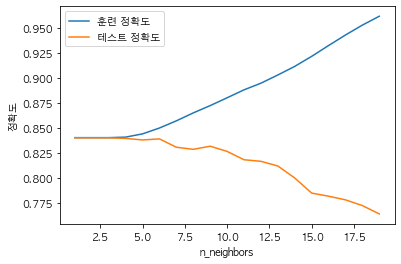

In [71]:
from sklearn.tree import DecisionTreeClassifier

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용

for k in range(1, 20, 1):
    
    # 모델 생성
    clf = DecisionTreeClassifier(max_depth=k)
    clf.fit(x_train, y_train)
    
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(x_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(x_test, y_test))
    
plt.plot(list(range(1, 20, 1)), training_accuracy, label="훈련 정확도")
plt.plot(list(range(1, 20, 1)), test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

### 회귀분석에서 과적합   
모델이 너무 복잡하면 과적합 되기가 쉽다

In [73]:
house_df = pd.read_csv('./ml_source_files/house_price.csv')
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [74]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [75]:
house_df.isnull().sum().sort_values(ascending=False)[:10]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
dtype: int64

In [76]:
house_df.drop(['PoolQC','MiscFeature','Alley','FireplaceQu','LotFrontage'], axis=1, inplace=True)

In [77]:
house_df.fillna(house_df.mean(), inplace=True)

In [78]:
house_df_ohe = pd.get_dummies(house_df)

In [79]:
house_df_ohe.shape

(1460, 275)

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [81]:
y = house_df_ohe['SalePrice']
x = house_df_ohe.drop(['SalePrice','Id'], axis=1)

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [117]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [118]:
train_preds = lr.predict(x_train)
test_preds = lr.predict(x_test)

In [119]:
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

In [120]:
print(train_mse, test_mse, train_mse/test_mse)  
# train에서 오차가 매우 작음 => 과적합 => 모델을 단순화

350936223.643397 1217279798.255358 0.2882954470667872


In [121]:
len(lr.coef_)
# 회귀계수(coef)가 273개인 매우 복잡한 회귀모델 => 과적합

273

### 회귀모델의 과적합 해소 => 회귀모델을 단순화
1. 변수의 수를 줄인다 => lasso
2. 계수의 값을 작게 만든다 => ridge

In [122]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

In [123]:
rid = Ridge(alpha=1000)
rid.fit(x_train, y_train)

rid_train_preds = rid.predict(x_train)
rid_test_preds = rid.predict(x_test)

rid_train_mse = mean_squared_error(y_train,rid_train_preds)
rid_test_mse = mean_squared_error(y_test,rid_test_preds)
print(rid_train_mse, rid_test_mse, rid_train_mse/rid_test_mse)

1055018441.6349732 1737676708.84951 0.6071431102586886


In [124]:
las = Lasso(alpha=10000)
las.fit(x_train, y_train)

las_train_preds = las.predict(x_train)
las_test_preds = las.predict(x_test)

las_train_mse = mean_squared_error(y_train,las_train_preds)
las_test_mse = mean_squared_error(y_test,las_test_preds)
print(las_train_mse, las_test_mse, las_train_mse/las_test_mse)

1278192823.5192862 1995999448.9122624 0.6403773428974886


In [128]:
train_acc = []
test_acc = []
mse_ratio = []

for a in np.arange(0.001, 1, 0.001):
    rid = Ridge(alpha=a)
    rid.fit(x_train, y_train)

    rid_train_preds = rid.predict(x_train)
    rid_test_preds = rid.predict(x_test)

    rid_train_mse = mean_squared_error(y_train,rid_train_preds)
    rid_test_mse = mean_squared_error(y_test,rid_test_preds)

    train_acc.append(r2_score(y_train, rid_train_preds))
    test_acc.append(r2_score(y_test, rid_test_preds))
    mse_ratio.append(rid_train_mse/rid_test_mse)

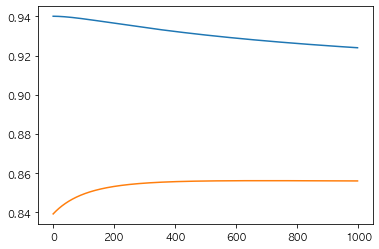

In [129]:
plt.plot(train_acc)
plt.plot(test_acc)